In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('social_network.csv')

In [3]:
data.head(3)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [4]:
data.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [5]:
data.shape

(400, 3)

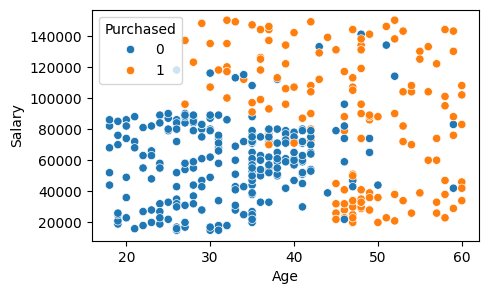

In [6]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Age',y='Salary',data=data,hue='Purchased')
plt.show()

In [7]:
x=data.iloc[:,:-1]

In [8]:
y=data['Purchased']

In [9]:
from sklearn.preprocessing import StandardScaler # now need to require scaling because age and salary 19 and 19000 big diff between both actual value

In [10]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [11]:
x.head(3)

,Age,Salary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290


In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [13]:
rus=RandomUnderSampler()

In [14]:
x_us,y_us=rus.fit_resample(x,y)

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [15]:
y_us.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
len(x_train)

320

In [19]:
len(x_test)

80

In [20]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree

In [21]:
dc=DecisionTreeClassifier()  

In [22]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
dc1=DecisionTreeClassifier(criterion='entropy')

In [24]:
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
dc.score(x_train,y_train)*100  , dc.score(x_test,y_test)*100 # model overfit because train score greater test score

(99.6875, 83.75)

In [26]:
dc1.score(x_train,y_train)*100  , dc1.score(x_test,y_test)*100 # model overfit with entropy

(99.6875, 83.75)

In [27]:
# Above decision tree model  1) gini 2)entropy there is no major difference between gini and entropy score now we go with gini default

In [28]:
dc.predict([[19	,19000]])

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [29]:
from mlxtend.plotting import plot_decision_regions

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


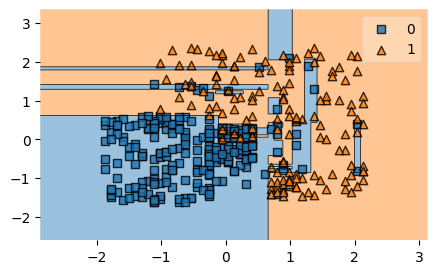

In [33]:
plt.figure(figsize=(5,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dc)               # gini model 
plt.show()

                            VS    between gini and entropy 

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


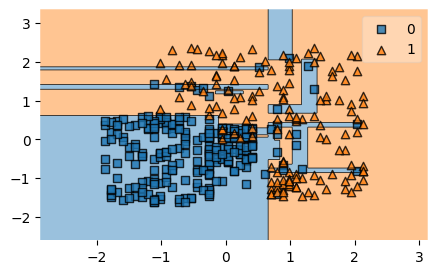

In [36]:
plt.figure(figsize=(5,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dc1)          # entropy model
plt.show()

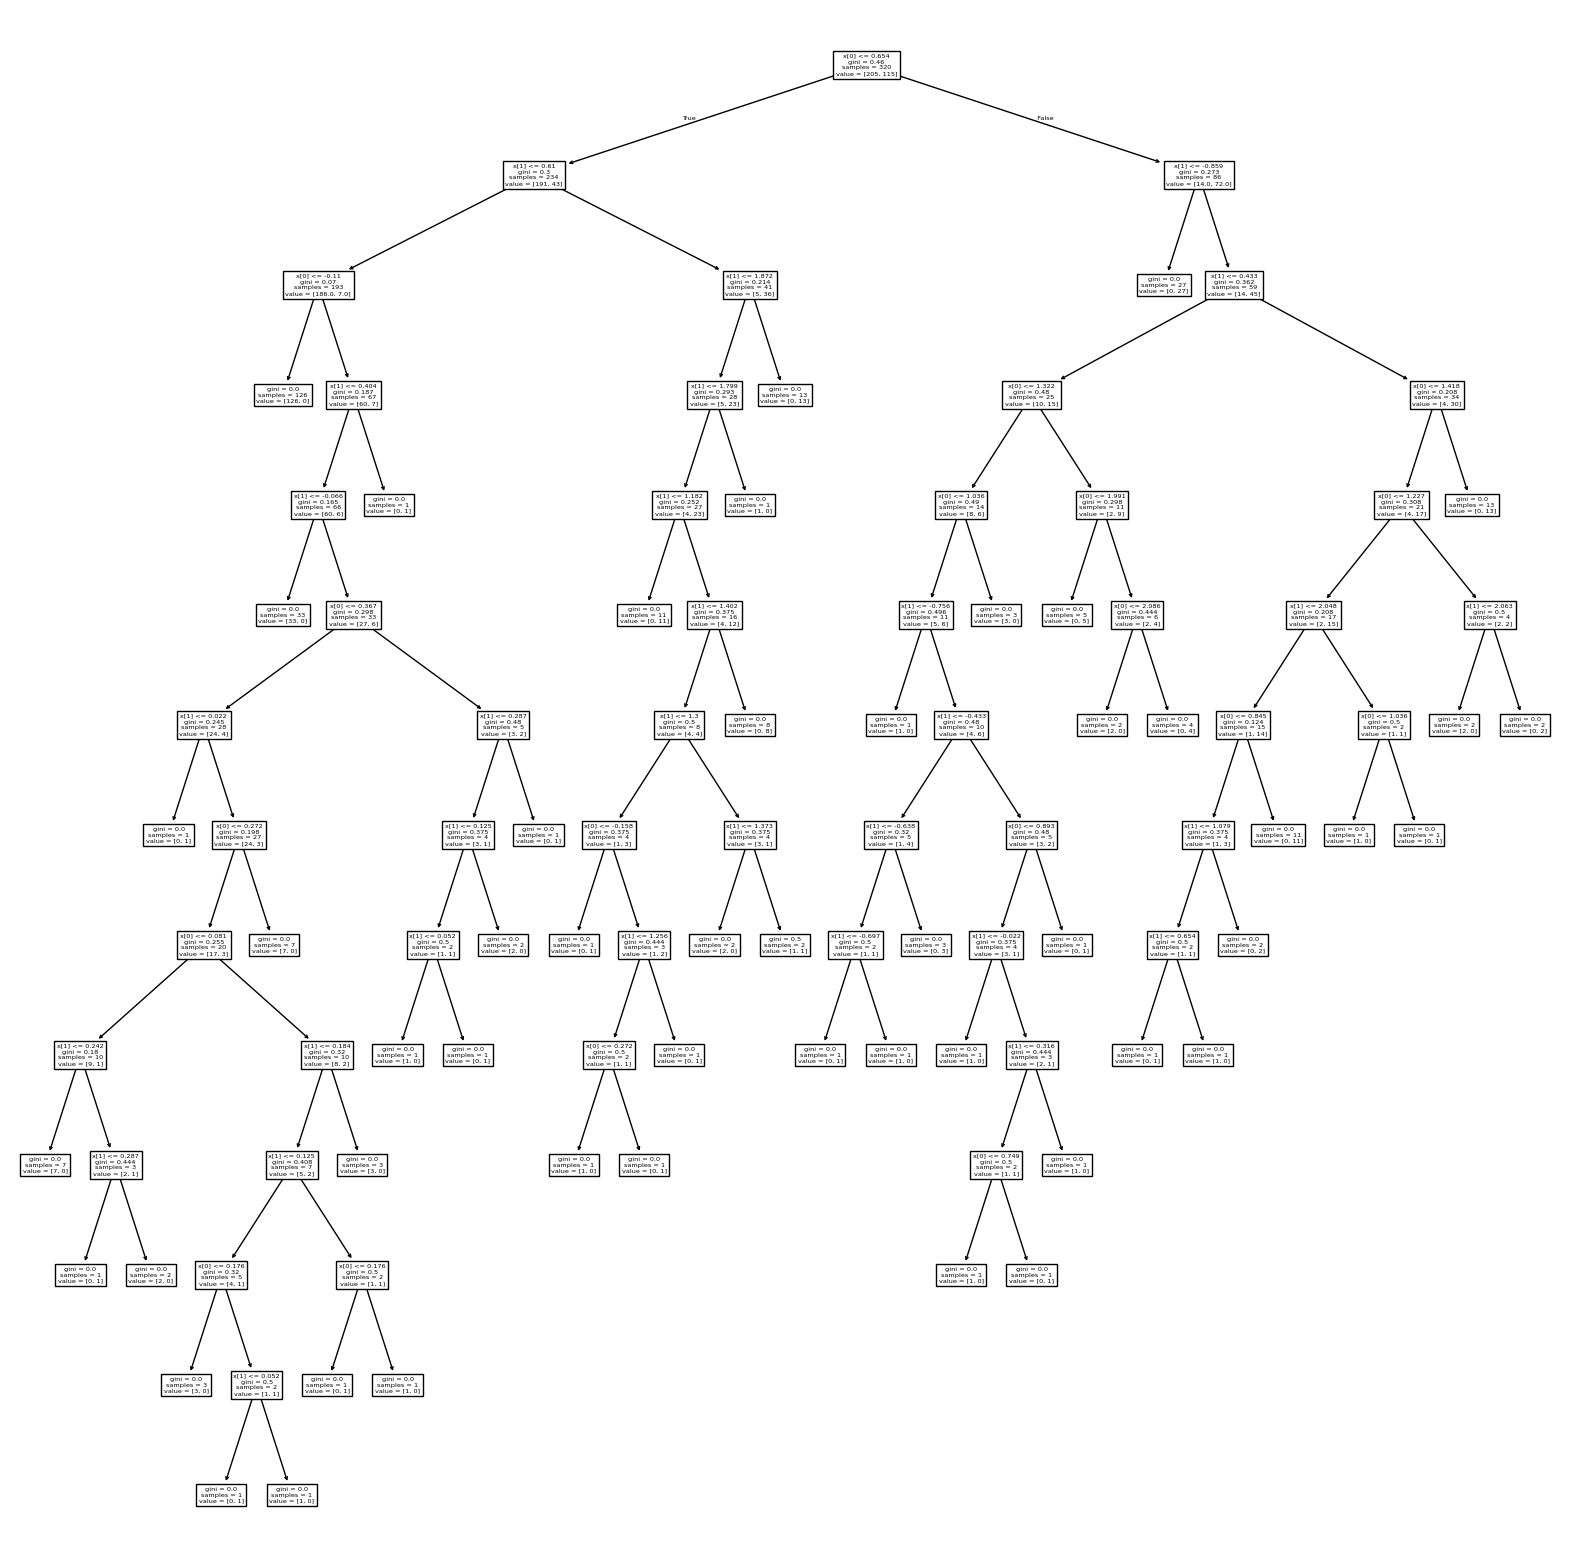

In [31]:
plt.figure(figsize=(20,20))
plt.savefig('tree.jpg')
plot_tree(dc)
plt.show()